In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set()

### Class Charge
Lets create a class **charge** with function **line** to calculate the distance between source and field point and function **V_point_charge** to calculate the electric potential ata field point **x,y** due to source point at **pos**.

In [3]:
class Charge:
    
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
    def line(self, x,y):
        self.vector = [x-self.pos[0],y-self.pos[1]]
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2)
        
    def V_point_charge(self, x,y):
        self.line(x,y)
        if self.norm >0:
            self.V = self.q/self.norm
            
        elif self.norm == 0:
            self.V = 0
            
        return self.V

In [21]:
C = Charge(100,[1,1]) # Charge q =100, x =1, y = 1 is position
print(C)

In [5]:
for x in range(3):
    for y in range(3):
        print(x,y,"|",C.V_point_charge(x,y))

0 0 | 70.71067811865474
0 1 | 100.0
0 2 | 70.71067811865474
1 0 | 100.0
1 1 | 0
1 2 | 100.0
2 0 | 70.71067811865474
2 1 | 100.0
2 2 | 70.71067811865474


### Total Electric potential

In [6]:
def V_total(x,y, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x,y)
        V = V + Vp
    return V

In [7]:
sample_charges = [Charge(q = 20, pos = [23,34]),
                  Charge(q = 25, pos = [13,48]),
                  Charge(q = 40, pos = [3,14]),
                  Charge(q = 80, pos = [88,60])]


V_total(x=4, y=4, charges = sample_charges)

5.892446541150622

### Lattice of charges (scatter)

In [8]:
q = 100

Qd = []

charges = []

for i in range(5):
    for j in range(5):
        
        Qd.append({"q":q, "x": i*20, "y": j*20})
        charges.append(Charge(q, [20*i, 20*j]))
        q = -q
        
print(Qd)
print(charges)

[{'q': 100, 'x': 0, 'y': 0}, {'q': -100, 'x': 0, 'y': 20}, {'q': 100, 'x': 0, 'y': 40}, {'q': -100, 'x': 0, 'y': 60}, {'q': 100, 'x': 0, 'y': 80}, {'q': -100, 'x': 20, 'y': 0}, {'q': 100, 'x': 20, 'y': 20}, {'q': -100, 'x': 20, 'y': 40}, {'q': 100, 'x': 20, 'y': 60}, {'q': -100, 'x': 20, 'y': 80}, {'q': 100, 'x': 40, 'y': 0}, {'q': -100, 'x': 40, 'y': 20}, {'q': 100, 'x': 40, 'y': 40}, {'q': -100, 'x': 40, 'y': 60}, {'q': 100, 'x': 40, 'y': 80}, {'q': -100, 'x': 60, 'y': 0}, {'q': 100, 'x': 60, 'y': 20}, {'q': -100, 'x': 60, 'y': 40}, {'q': 100, 'x': 60, 'y': 60}, {'q': -100, 'x': 60, 'y': 80}, {'q': 100, 'x': 80, 'y': 0}, {'q': -100, 'x': 80, 'y': 20}, {'q': 100, 'x': 80, 'y': 40}, {'q': -100, 'x': 80, 'y': 60}, {'q': 100, 'x': 80, 'y': 80}]
[<__main__.Charge object at 0x000001F271A0EE50>, <__main__.Charge object at 0x000001F271A0E490>, <__main__.Charge object at 0x000001F271A0EE20>, <__main__.Charge object at 0x000001F271A0ECA0>, <__main__.Charge object at 0x000001F271A0EFD0>, <__mai

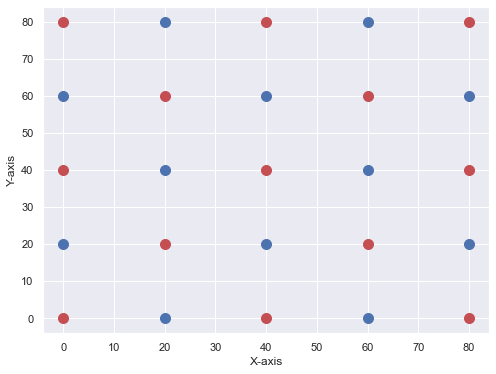

In [25]:
plt.figure(figsize = [8,6])

for item in Qd:
    
    if item['q']> 0:
        plt.scatter(item['x'], item['y'], c = 'r', s =100)
        
    else:
        plt.scatter(item['x'], item['y'], c = 'b', s =100)
        
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Electric Potential (heatmap)

In [35]:
# To find Electric potential at several points due to lattice of charges
X = np.arange(-10,110,2)
Y = np.arange(-10,110,2)

V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x,y, charges)
        V[i][j] = v

In [39]:
vv =np.array(V)
print(vv)

[[4.56757626 5.15256208 5.75544011 ... 2.19896964 2.03857473 1.90204466]
 [5.15256208 6.0138754  6.99446498 ... 2.24158604 2.06927157 1.92459953]
 [5.75544011 6.99446498 8.58159934 ... 2.26629799 2.08538147 1.93530162]
 ...
 [2.19896964 2.24158604 2.26629799 ... 1.71075787 1.64266913 1.57825152]
 [2.03857473 2.06927157 2.08538147 ... 1.64266913 1.58360968 1.52700163]
 [1.90204466 1.92459953 1.93530162 ... 1.57825152 1.52700163 1.47728094]]


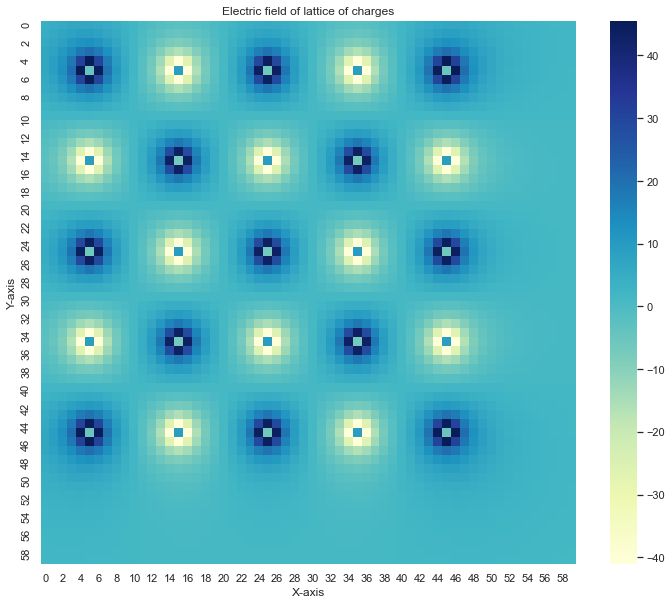

In [43]:
plt.figure(figsize = [12,10])
sns.heatmap(vv,annot=False,cmap='YlGnBu')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Electric field of lattice of charges")
plt.show()

### Electric Field(meshgrid)

In [67]:
from matplotlib.patches import Circle

In [68]:
# To claculate Electric Field at point x,y due to charge q at r0
def E(q, r0, x, y):
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q* (x - r0[0]) / den, q* (y - r0[1]) / den

In [69]:
# To define the number of charge in the system
nq = 2**int(2)

In [70]:
# To create the meshgrid to make a plot
nx, ny = 16, 16
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y =np.meshgrid(x, y)

In [71]:
# To define charge touples (q,x0,y0)
charges = []
for i in range(nq):
    q = i%2 * 2 -1 
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

In [72]:
# To calculate Electric Field at point x, y due to predefine charge distribution
# Electric field vector, E =(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x =X, y=Y)
    Ex += ex
    Ey += ey

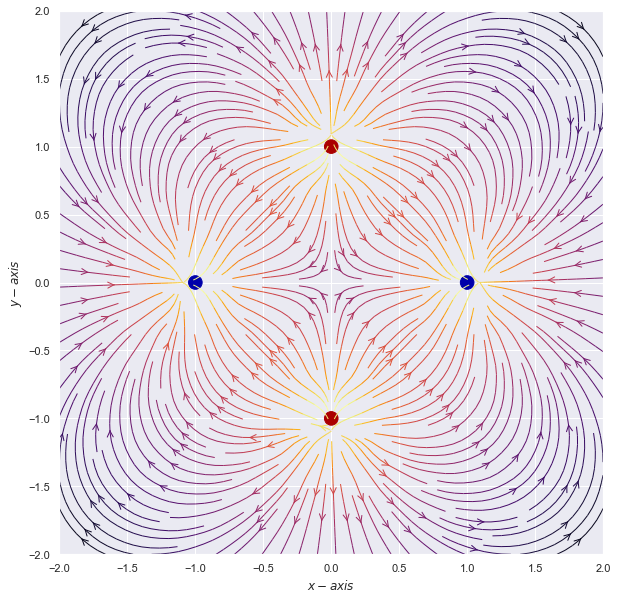

In [74]:
# To plot Vector Field for Electric Field using streamplot
fig = plt.figure(figsize = [12,10])
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x,y,Ex,Ey, color=color, linewidth=1, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))
    
ax.set_xlabel('$x-axis$')
ax.set_ylabel('$y-axis$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()


### Vector Field (quiver)

In [62]:
# To set number of points and create space of x,y for vector field
N = 25
x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/N)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/N)

In [63]:
# To create meshgrid for plot
X,Y = np.meshgrid(x,y)

In [64]:
# To create parametric variabels for vector field
U = np.sin(X)*np.cos(Y)
V = -np.cos(X)*np.sin(Y)

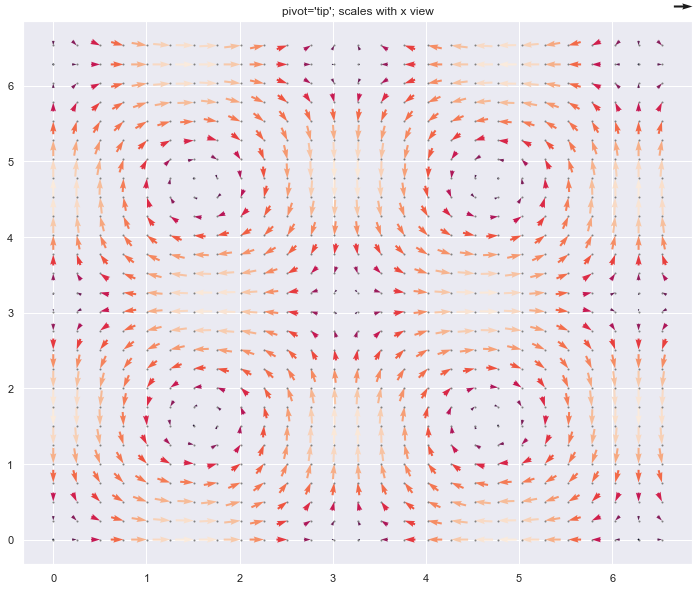

In [66]:
# To create Plot
fig3, ax3 = plt.subplots(figsize = [12,10])
ax3.set_title("pivot='tip'; scales with x view")

M = np.hypot(U, V)
Q = ax3.quiver(X, Y, U, V, M, 
               units='x', 
               pivot='tip', 
               width = 0.022, 
               scale=1/0.20)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1,
                  r'$1 \frac{m}{s}$' ,
                  labelpos='E',
                  coordinates='figure')

ax3.scatter(X,Y,color='0.5', s=1)
plt.show()